<h1><center>Laboratorio 5: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Matias Rojas y Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Ortiz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Johnny Godoy

### **Link de repositorio de GitHub:** `https://github.com/johnny-godoy/laboratorios-mds/blob/main/lab%205/laboratorio_5.ipynb`


## Reglas:

- **Grupos de 2 personas**
- **Ausentes** deberán realizar la actividad solos. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
import datetime

from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype
import pandas as pd
import plotly.express as px
from scipy import stats

<p align="center"><iframe width="560" height="315" src="https://www.youtube.com/embed/MW4d8_LLYp8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe></p>

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [13]:
df_retail = pd.read_pickle("data/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
df_no_duplicates_or_nans = df_retail.drop_duplicates().dropna()
df_no_duplicates_or_nans.groupby(["Invoice", "StockCode"]).size()

Invoice  StockCode   
489434   10002           0
         10080           0
         10109           0
         10120           0
         10125           0
                        ..
C538164  gift_0001_60    0
         gift_0001_70    0
         gift_0001_80    0
         gift_0001_90    0
         m               0
Length: 133475712, dtype: int64

¿Cuáles son los tipos de datos?

In [3]:
df_retail.dtypes

Invoice              category
StockCode            category
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID          category
Country                object
dtype: object

¿Qué rango tienen los datos?

In [4]:
for nombre, columna in df_retail.select_dtypes(["category", "object"]).items():
    print(f"Cantidad de valores únicos de {nombre}: {columna.nunique()}")

for nombre, columna in df_retail.select_dtypes(["int64", "datetime64[ns]", "float64"]).items():
    print(f"Rando de valores para {nombre}: {[columna.min(), columna.max()]}")

Cantidad de valores únicos de Invoice: 28816
Cantidad de valores únicos de StockCode: 4632
Cantidad de valores únicos de Description: 4682
Cantidad de valores únicos de Customer ID: 4383
Cantidad de valores únicos de Country: 40
Rando de valores para Quantity: [-9600, 19152]
Rando de valores para InvoiceDate: [Timestamp('2009-12-01 07:45:00'), Timestamp('2010-12-09 20:01:00')]
Rando de valores para Price: [-53594.36, 25111.09]


| Atributo    | Tipo de Datos  | Rango                   | Explicación                     |
|-------------|----------------|-------------------------|---------------------------------|
| Invoice     | category       | 28816 códigos           | Identificador de la boleta      |
| StockCode   | category       | 4632 códigos            | Código del producto             |
| Description | object         | 4682 descripciones      | Descripción del producto        |
| Quantity    | int64          | [-9600, 19152]          | Cantidad transaccionada         |
| InvoiceDate | datetime64[ns] | 01/12/2009 - 09/12/2010 | Fecha de la transacción         |
| Price       | float64        | [-53594.36, 25111.09]   | Precio del producto             |
| Customer ID | category       | 4383 códigos            | Identificador del cliente       |
| Country     | object         | 40 países               | País de la transacción          |

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El análisis univariado estudia la distribución marginal de cada una de las columnas por separado. En el análisis multivariado, uno estudia las relaciones entre múltiples variables. Analizar datos faltantes busca ver si hay columnas incompletas (valores NaN u otros) o filas faltantes (eg: en caso de datos secuenciales, ver si falta un paso).

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [18]:
def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

    Análisis de la primera serie...

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

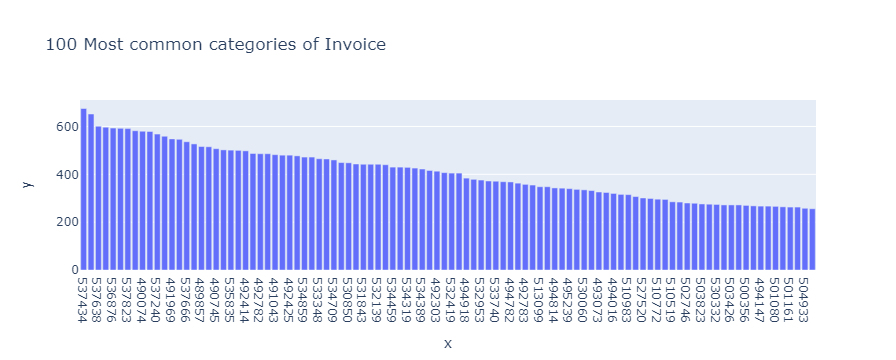

In [19]:
profile_serie(df_retail['Invoice'])

Como ya sabíamos, este es un identificador, por lo cual existen muchas categorías. Estas no tienen orden asociado.

Estas se repiten dado que en una boleta se pueden realizar varias compras, así que hay una gran cantidad de filas repetidas. Como es necesario que toda transacción tenga boleta asociada, no hay valores faltanres. 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

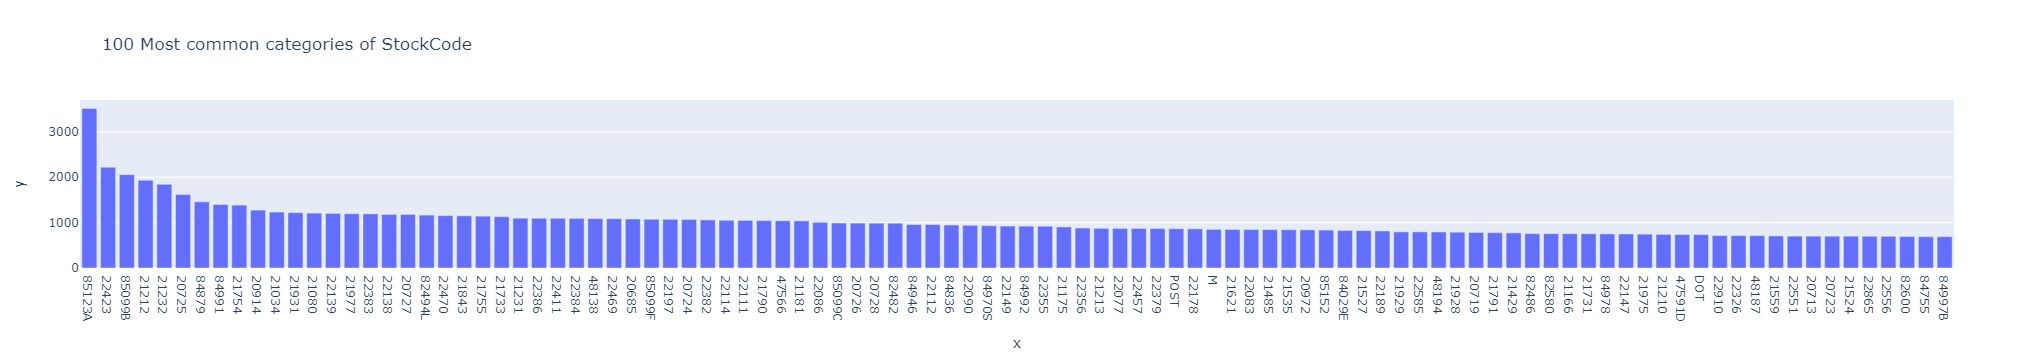

In [21]:
profile_serie(df_retail.StockCode)

Acá el análisis es muy similar al código de boleta, pero existen muchos menos valores únicos, dado que hay menos productos posibles que boletas emitidas - así, esta tiene más valores duplicados.

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

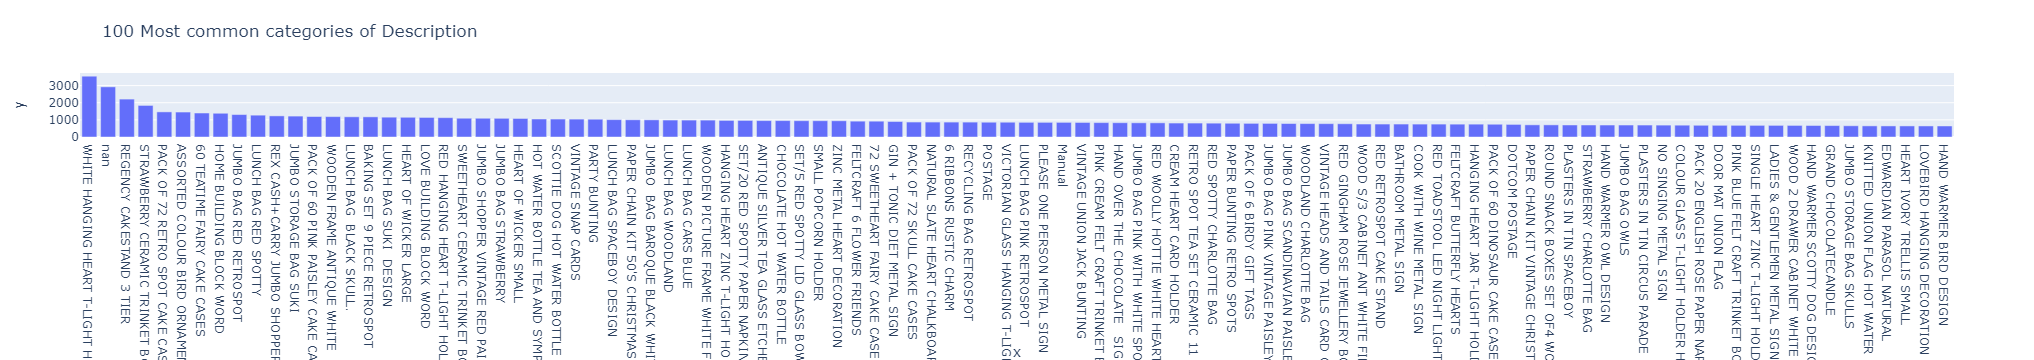

In [23]:
profile_serie(df_retail.Description)

Nuevamente una serie categórica con alto rango de posibilidades. De hecho, se espera que este sea muy similar a los códigos (pues dos productos deberían tener la misma despcrición si y solamente si tienen el mismo código).
El histograma se distorsiona debido a las etiquetas del eje x tan largas, pero la forma es similar a los casos anteriores. Tiene mayor costo de memoria que el caso anterior pues tiene un campo de texto libre.
Hay 0.3% más valores duplicados que el stockcode, y tiene 50 valores únicos extra. Cabe investigar esto más a fondo.

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

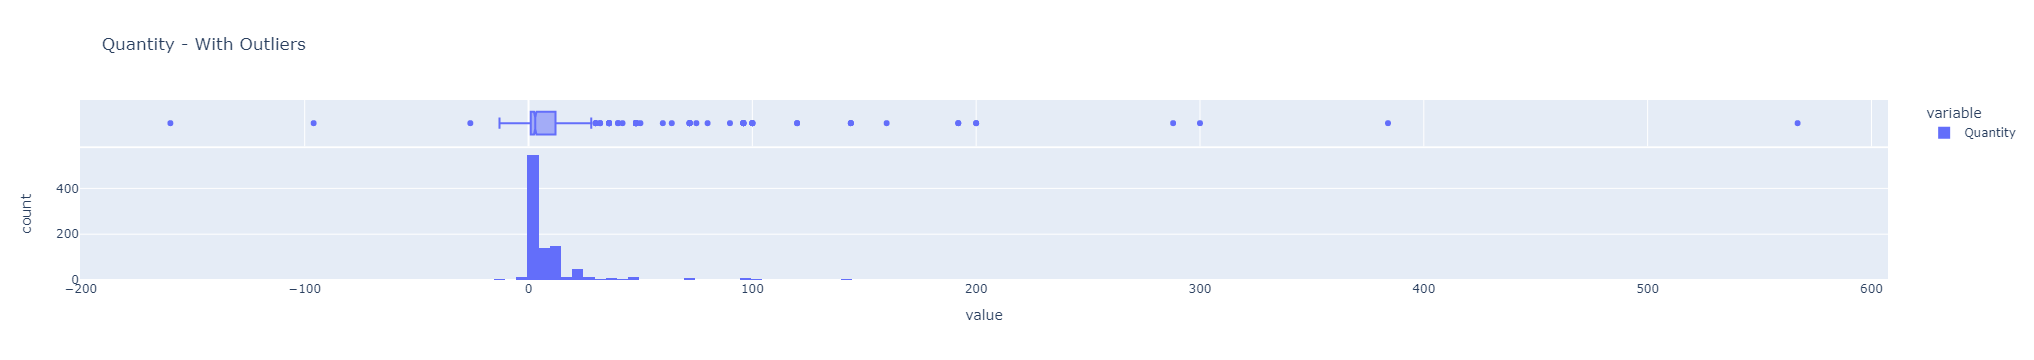

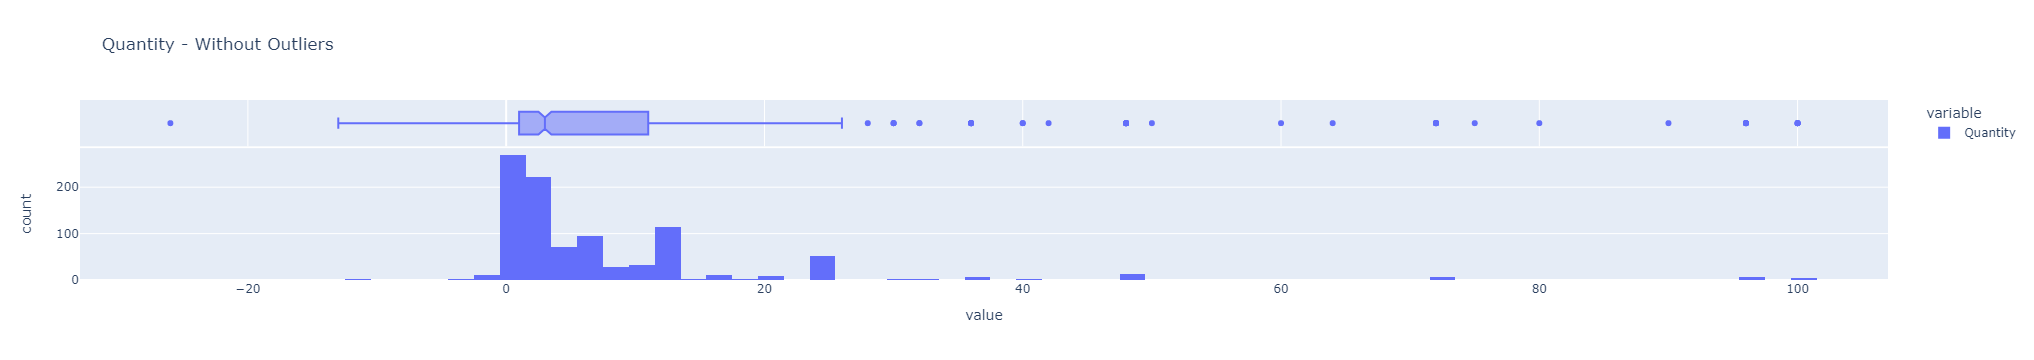

In [24]:
profile_serie(df_retail.Quantity)

La distribución de la cantidad se caracteriza por tener:
* Ligero skew positivo
* Alta kurtosis
* Outlier grandes

La eliminación de outliers mantiene estas propiedades. Siguen existiendo valores negativos, que hay que poder interpretar dado que forman 2.35% de los datos. Viendo antes algunas de las filas, estas podían ser devoluciones.

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

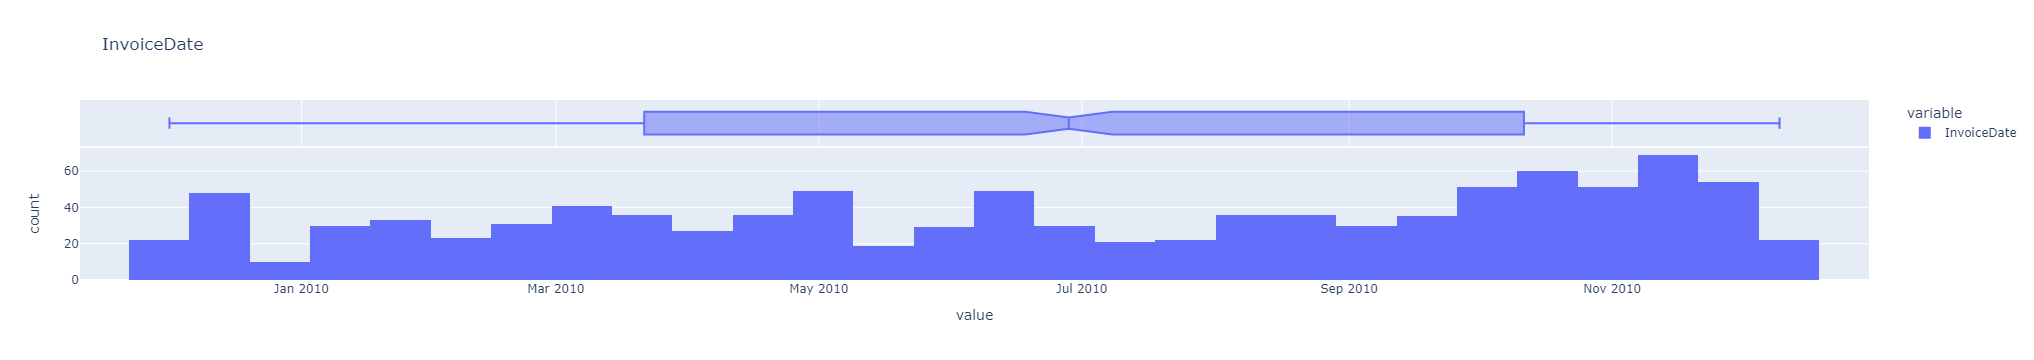

In [25]:
profile_serie(df_retail.InvoiceDate)

En el histograma notamos una distribución multimodal, que parece seguir una periodicidad, en particular, se alcanza un máximo local de datos obtenidos cada mes.

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

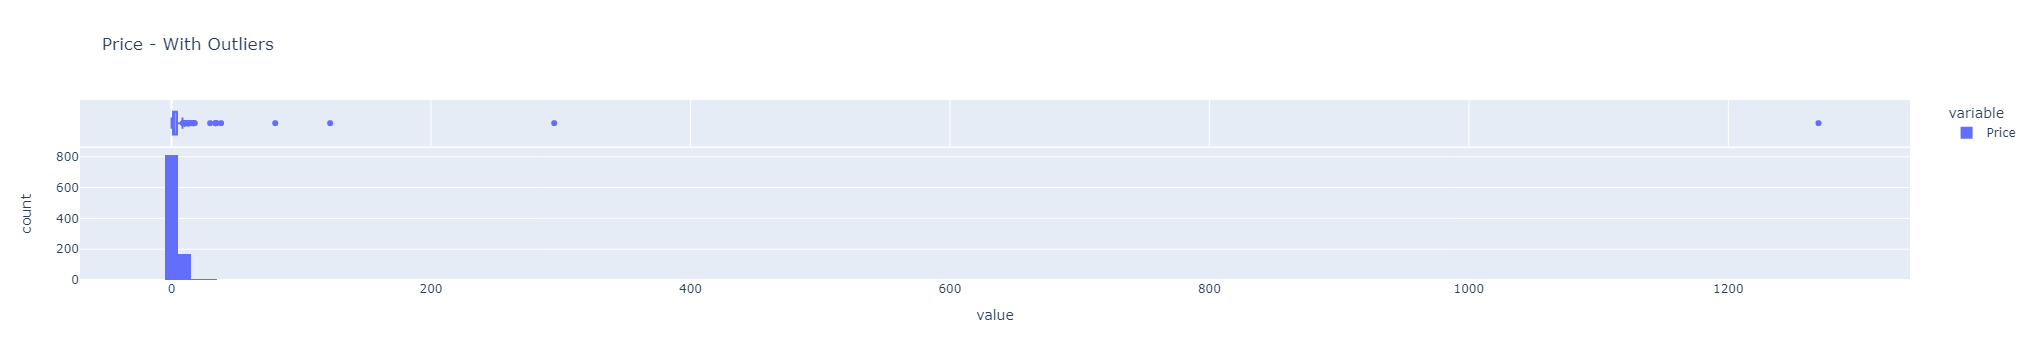

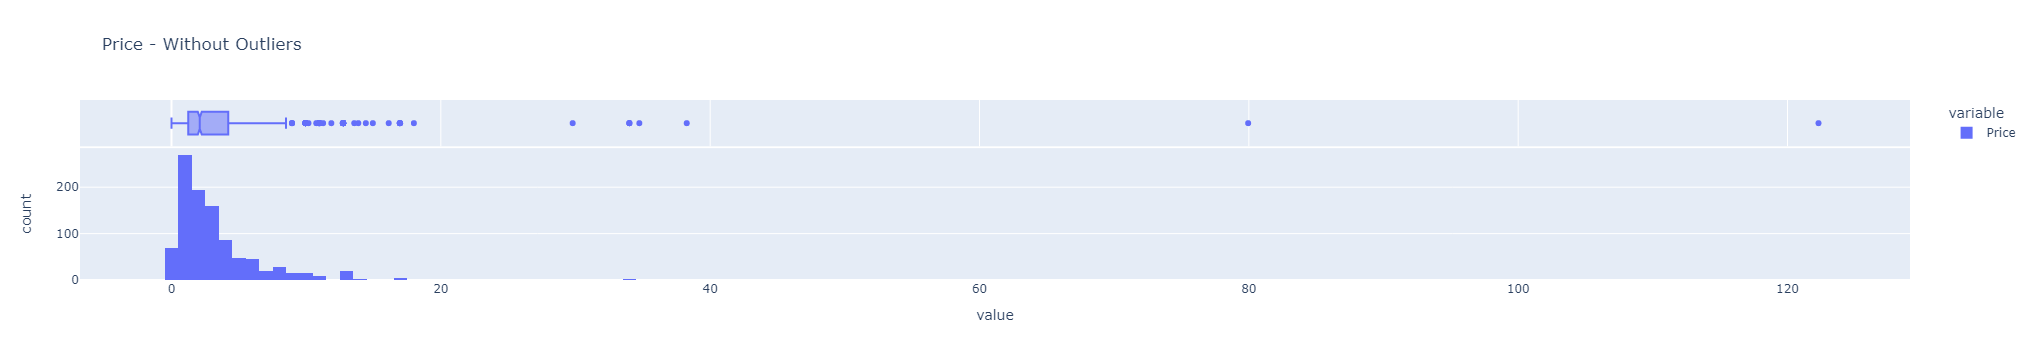

In [26]:
profile_serie(df_retail.Price)

En los precios vemos que existen nuevamente outliers muy enormes, aunque al menos no existen precios negativos que haya que interpretar. La eliminación de outliers no fue suficientemente efectiva, pues faltaron 2 valores. Eliminando estos, la distribución se parece a una lognormal, que es razonable en montos.

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

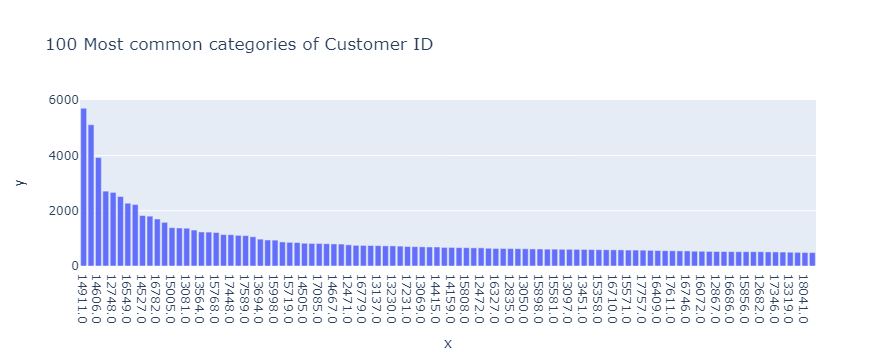

In [27]:
profile_serie(df_retail["Customer ID"])

Nuevamente una columna de identificación, pero a diferencia de las anteriores, era si puede ser nula, pues no todo cliente tiene un id asignado (por ejemplo, podrían no estar registrados en el sistema). Es interesante ver en el histograma que hay clientes con muy alta cantidad de compras, lo cual rápidamente cae a ser casi constante. Esto se parece más a una ley de potencia. 

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

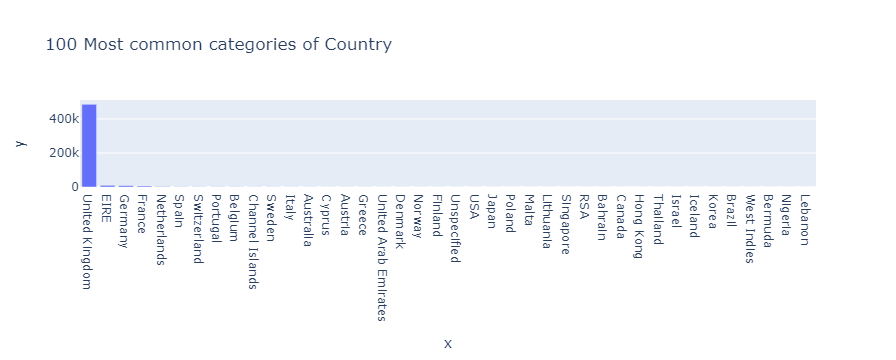

In [34]:
profile_serie(df_retail.Country)

Esencialmente todo dato es del Reino Unido.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [29]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

La matriz de valoresnulos puede ser más interesante si ordenamos los datos según fecha, para ver cómo evolucionaron los valores faltantes.

## Bivariant Analysis:

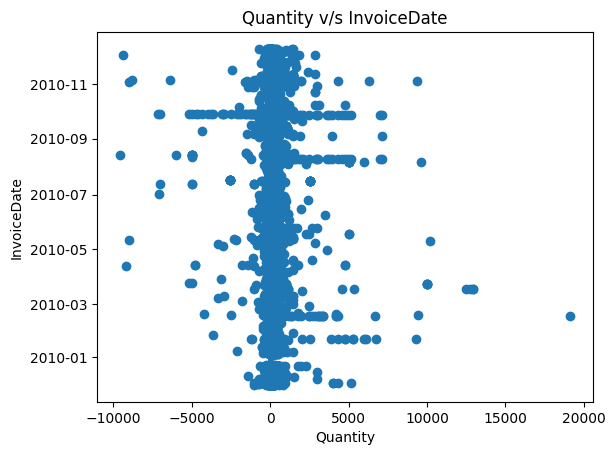

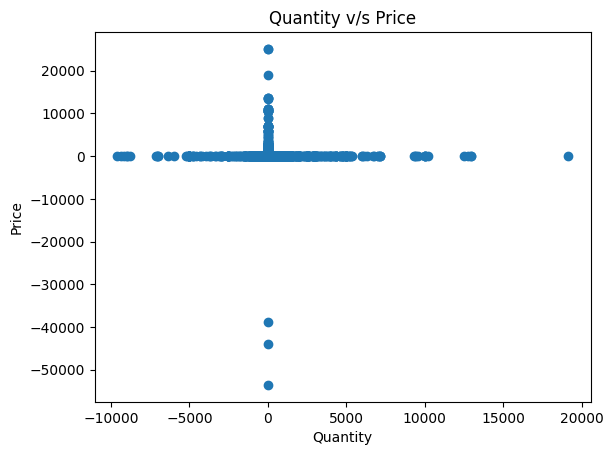

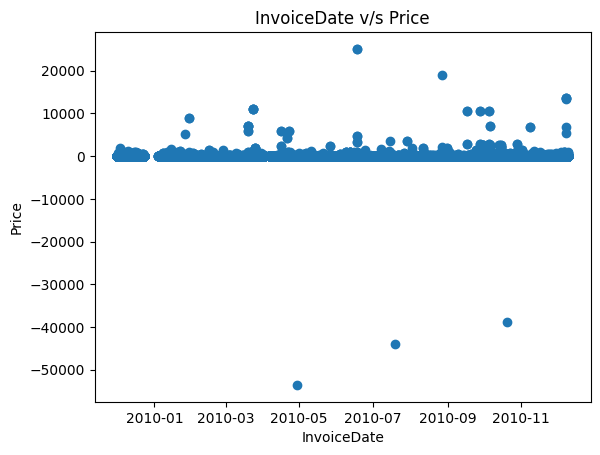

## Correlation:

C:\Users\David\AppData\Local\Temp\ipykernel_17016\4178638371.py:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



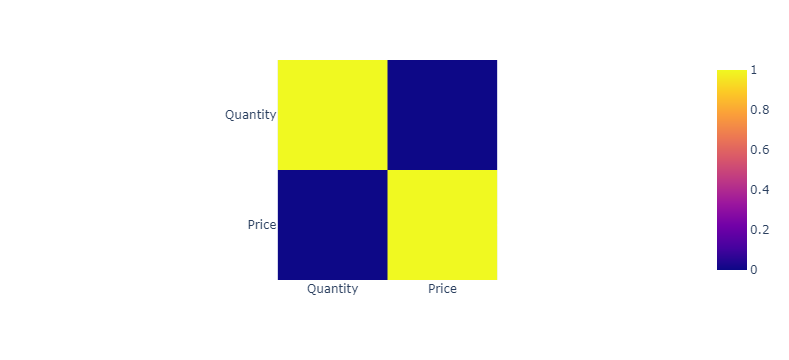

## Missing Matrix:

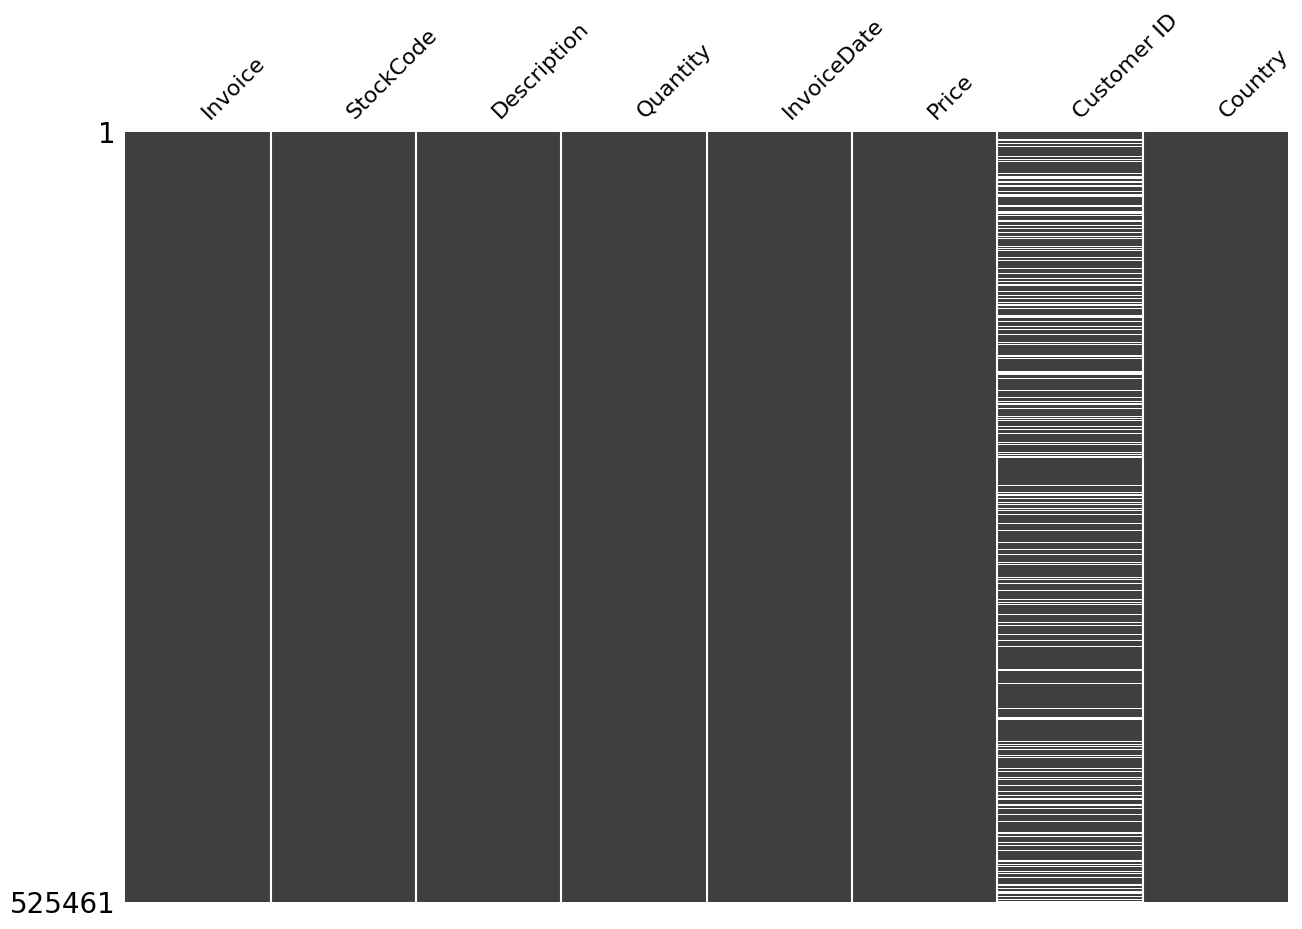

In [47]:
df_sorted = df_retail.sort_values("InvoiceDate")
profile_df(df_sorted)

Respecto a los gráficos de dos variables, estos siempre muestran una recta.
Esto es debido a que las variables numéricas (salvo la fecha) tienen casi sus valores extremadamente concentrados. Eliminar los valores fuera de esta recta podrían revelar patrones más interesantes.
La correlación entre precio y cantidad es nula, como podría esperarse.
Tal como se vió en el análisis univariado, el único caso de valores faltantes es el identificador del usuario, pues es lo único que no es necesario en una transacción válida. No se vé un patrón en el tiempo.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [54]:
def limpiar_datos(datos_sucios: pd.DataFrame) -> pd.DataFrame:
    datos_limpios = datos_sucios.dropna().drop_duplicates()  # Eliminando filas duplicadas o con nulos
    # Eliminando cantidades y precios no positivos
    datos_limpios = datos_limpios[datos_limpios.Quantity > 0]
    datos_limpios = datos_limpios[datos_limpios.Price > 0]
    return datos_limpios

In [51]:
df_clean = limpiar_datos(df_sorted)
df_clean.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Invoice Profile

Type                           category
Number of observations           400916
Unique                            19213
Top                              500356
Freq                                251
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   399186
Duplicate rows (%)              99.57 %
Total size in memory      5296496 bytes
dtype: object

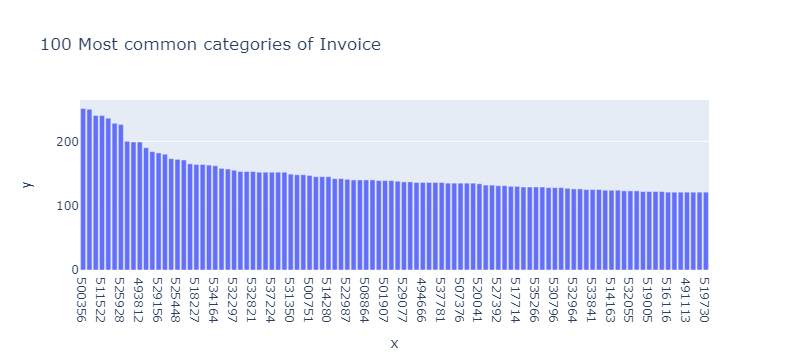

## StockCode Profile

Type                           category
Number of observations           400916
Unique                             4017
Top                              85123A
Freq                               3107
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400754
Duplicate rows (%)              99.96 %
Total size in memory      4178352 bytes
dtype: object

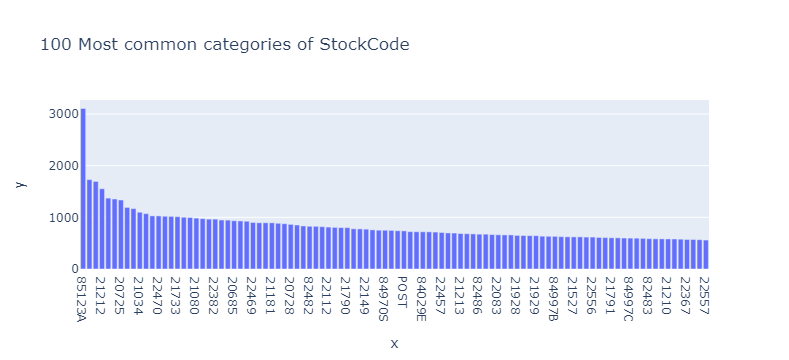

## Description Profile

Type                                                  object
Number of observations                                400916
Unique                                                  4444
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3107
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        400710
Duplicate rows (%)                                   99.95 %
Total size in memory                           6414656 bytes
dtype: object

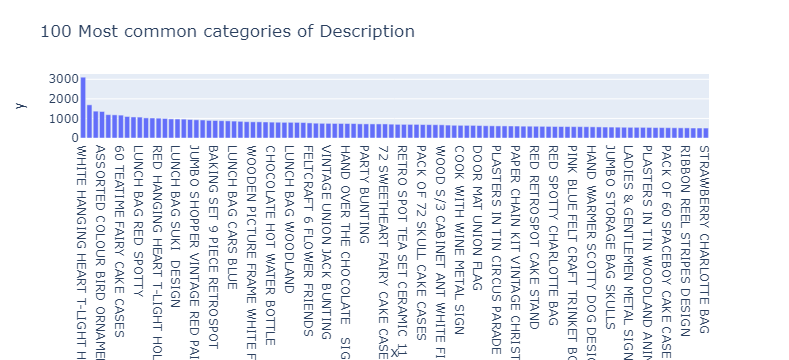

## Quantity Profile

Type                              int64
Number of observations         400916.0
Mean                          13.767418
Std                           97.638385
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        9418.363882
Skew                          79.281875
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400802
Duplicate rows (%)              99.97 %
Total size in memory      6414656 bytes
dtype: object

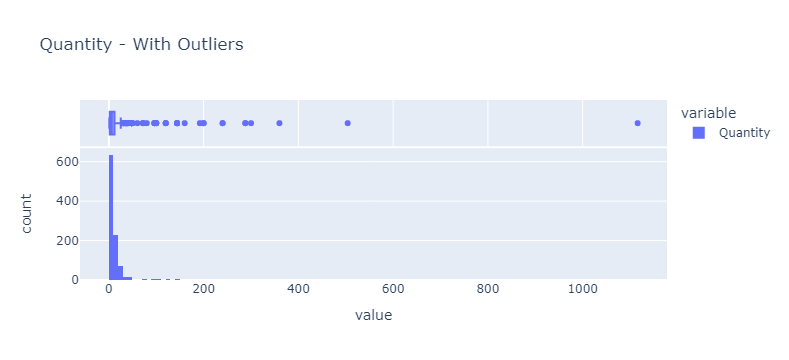

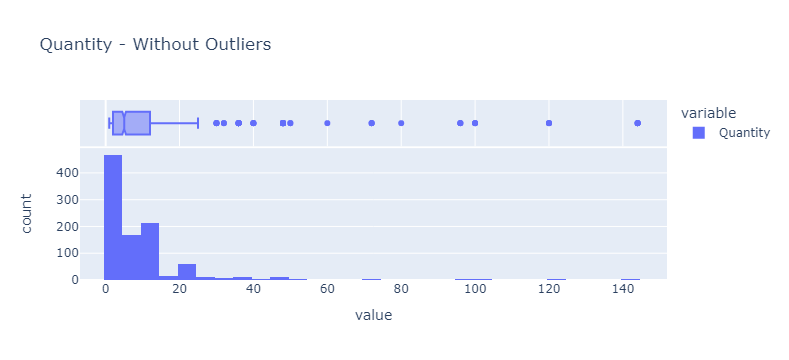

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           400916
Mean                      2010-07-01 05:01:16.167027712
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 13:28:00
50%                                 2010-07-09 10:26:00
75%                                 2010-10-14 13:58:45
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   399449
Duplicate rows (%)                              99.63 %
Total size in memory                      6414656 bytes
dtype: object

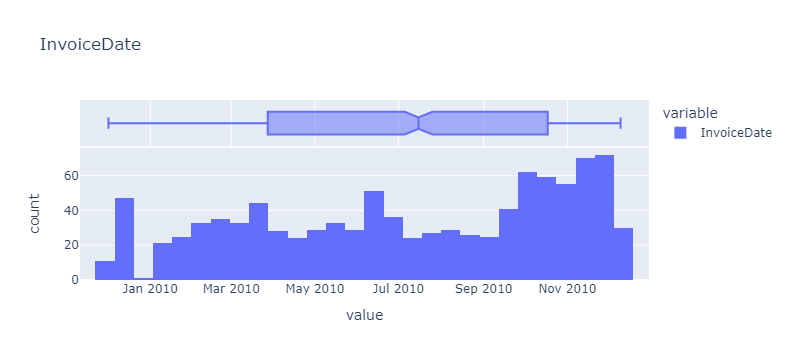

## Price Profile

Type                            float64
Number of observations         400916.0
Mean                           3.305826
Std                           35.047719
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                             10953.5
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       62818.874688
Skew                         233.142978
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400730
Duplicate rows (%)              99.95 %
Total size in memory      6414656 bytes
dtype: object

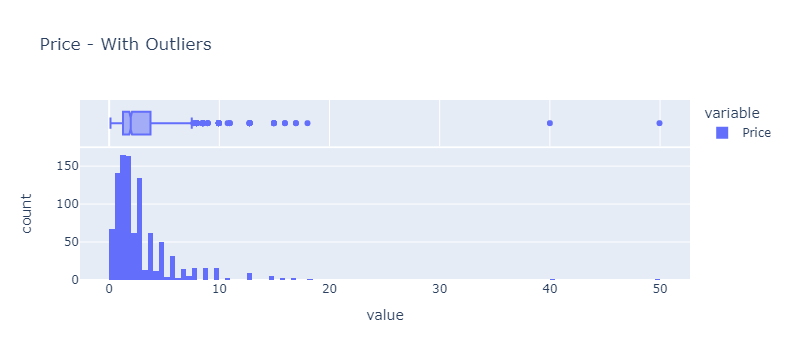

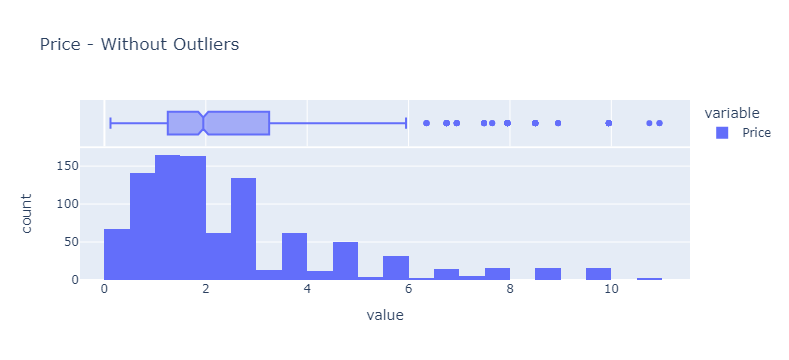

## Customer ID Profile

Type                           category
Number of observations         400916.0
Unique                           4312.0
Top                             14911.0
Freq                             5568.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   400825
Duplicate rows (%)              99.98 %
Total size in memory      4176360 bytes
dtype: object

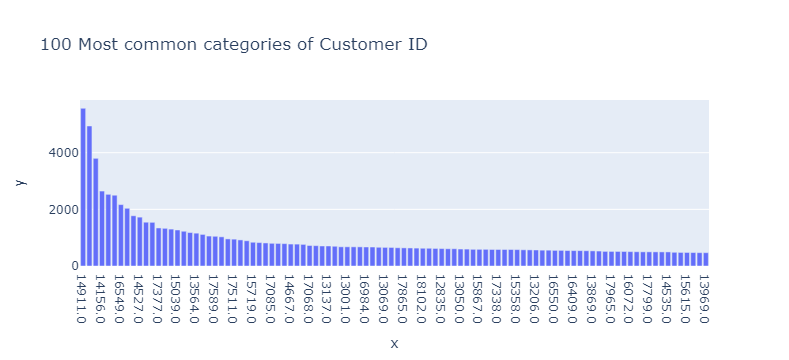

## Country Profile

Type                              object
Number of observations            400916
Unique                                37
Top                       United Kingdom
Freq                              364233
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    400916
Duplicate rows (%)               100.0 %
Total size in memory       6414656 bytes
dtype: object

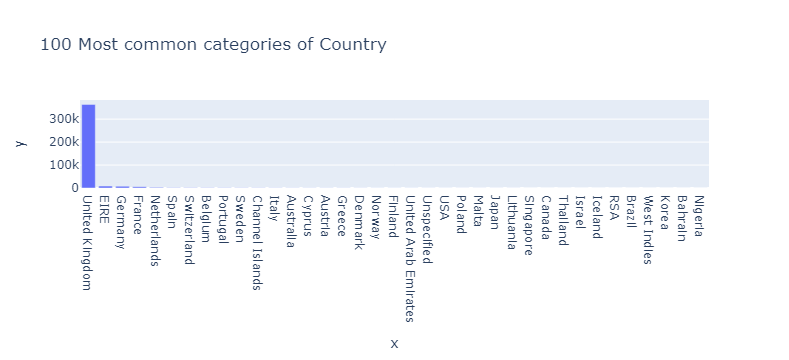

In [52]:
for column in df_clean:
    profile_serie(df_clean[column])

* Eliminar precios negativos hizo que pasara de tener skew negativo a positivo. También se logró una eliminación de outliers mucho más efectiva, pues la distribución real era más concentrada de lo que hacían parecer los datos erróneos
* Esto ocurre a menor efecto para la cantidad de productos.
* Eliminar filas cambió la distribución de fechas: Solamente una transacción entre 20/12/09 y 02/01/10. 

## Bivariant Analysis:

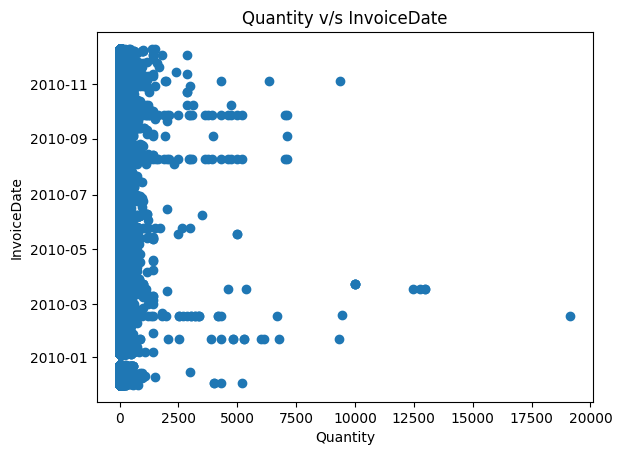

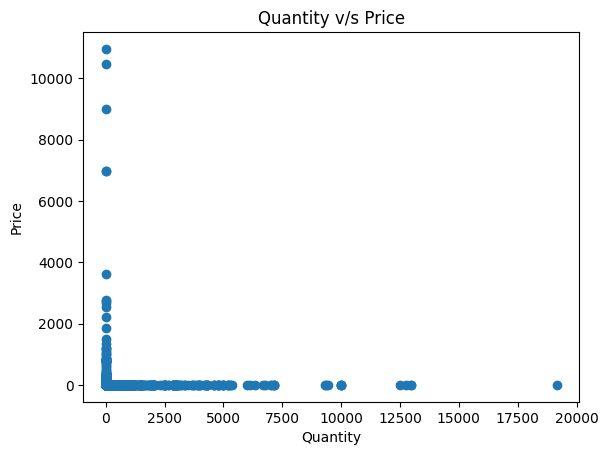

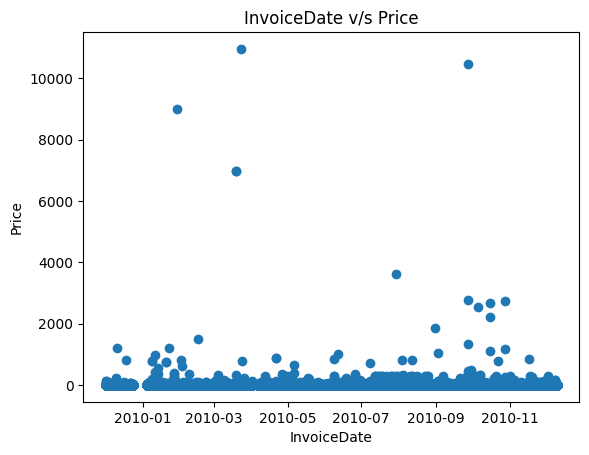

## Correlation:

C:\Users\David\AppData\Local\Temp\ipykernel_17016\4178638371.py:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



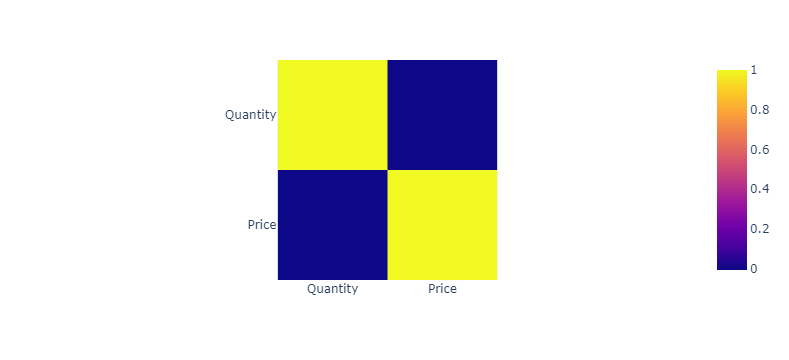

## Missing Matrix:

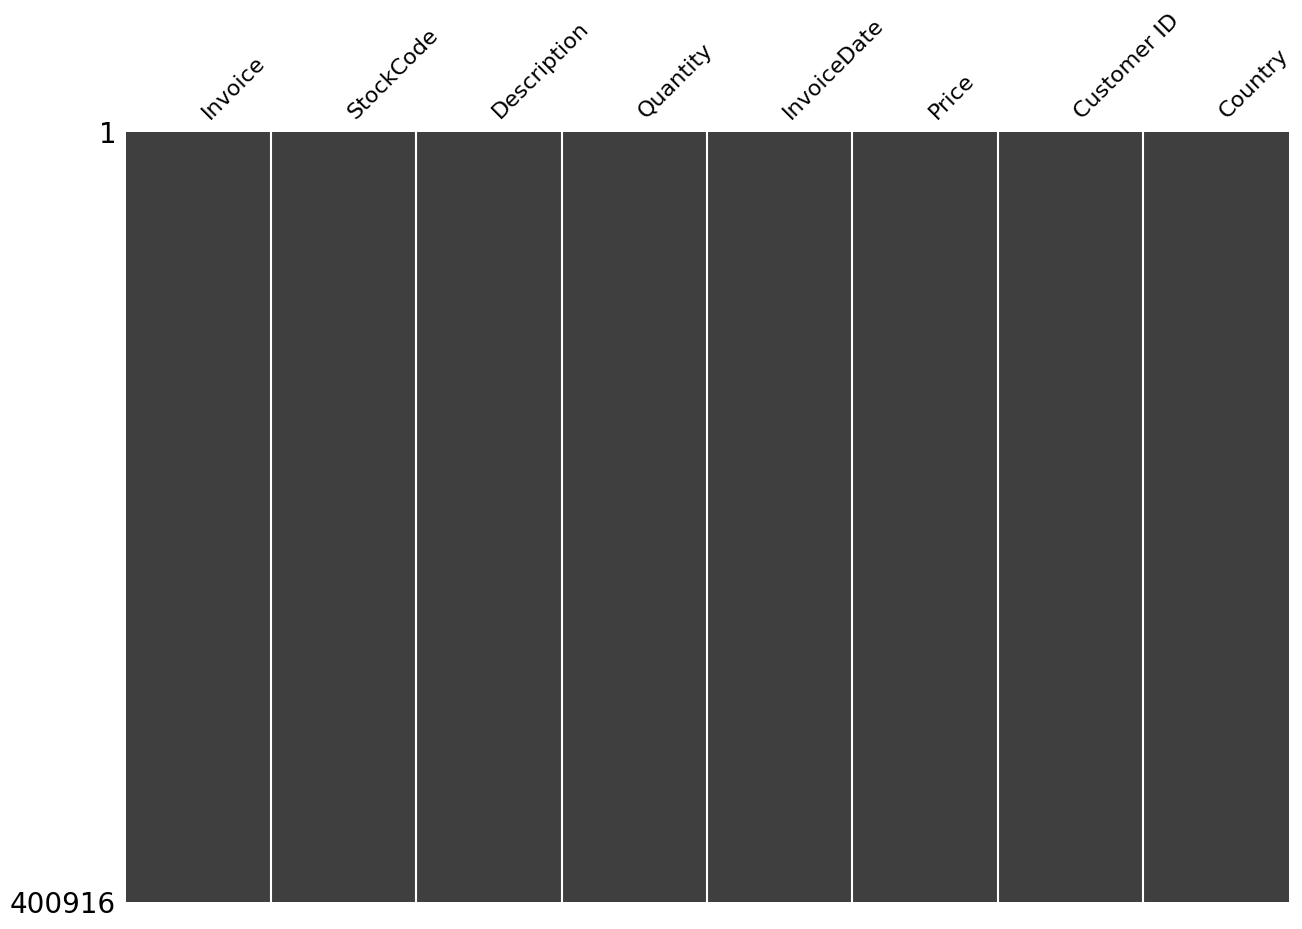

In [55]:
profile_df(df_clean)

No hay nuevas observaciones salvo la eliminación de valores nulos. Las distribuciones numéricas siguen muy concentradas en un valor.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [107]:
df_clean["Income"] = df_clean.Price*df_clean.Quantity
product_gains = df_clean.groupby("Description")[["Quantity", "Income"]].sum()
product_gains.rename(columns={"Quantity": "SoldQuantity"}, inplace=True)
product_gains.reset_index(inplace=True)
product_gains.Description = product_gains.Description.str.lower()
product_gains

,Description,SoldQuantity,Income
0,doormat union jack guns and roses,167,1071.25
1,3 stripey mice feltcraft,662,1241.10
2,4 purple flock dinner candles,200,265.20
3,animal stickers,385,80.85
4,black pirate treasure chest,45,74.25
...,...,...,...
4439,zinc heart lattice tray oval,325,364.15
4440,zinc metal heart decoration,13771,16472.75
4441,zinc police box lantern,193,783.70
4442,zinc top 2 door wooden shelf,233,1325.35


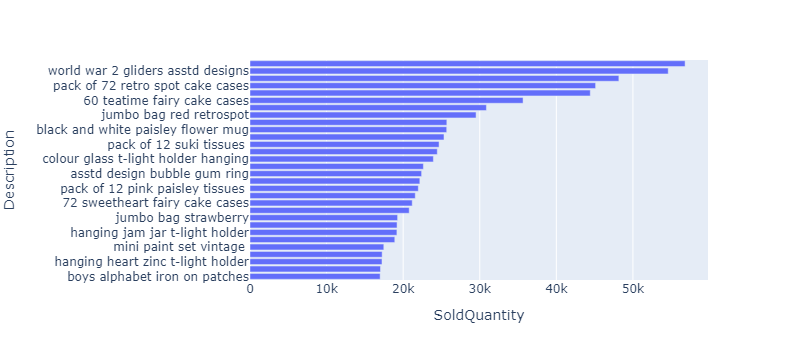

In [122]:
top = product_gains.nlargest(columns="SoldQuantity", n=30)[::-1]
px.bar(top, y="Description", x="SoldQuantity")

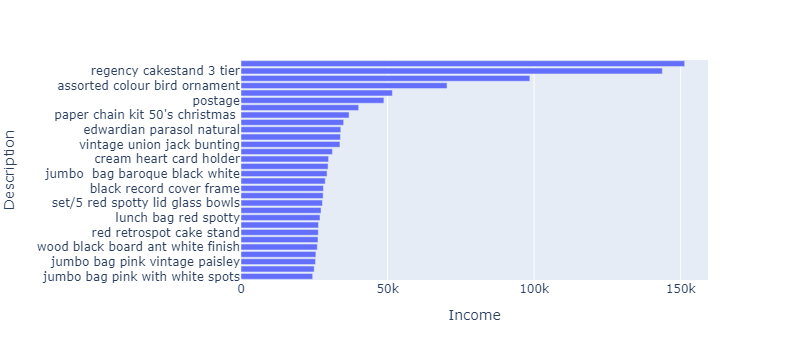

In [121]:
top = product_gains.nlargest(columns="Income", n=30)[::-1]
px.bar(top, y="Description", x="Income")

El artículo más vendido ("white hanging heart t-light holder") es efectivamente el que produce más ganancias, pero esto no es una regla general. "world war 2 gliders asstd designs" se vende en casi igual cantidad, pero no es de los top 30 de mayor ganancia, y "regency cakestand 3 tier" es el segundo de mayor ganancia y no está en los top 30 más vendidos.

Luego, es el segundo gráfico el que realmente no da la información de los más vendidos.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [171]:
def plot_ventas(dataframe):
    df_base = dataframe[["InvoiceDate", "Quantity"]].copy()
    time_period = (("d", "Daily"),
                   ("7d", "Weekly"),
                   ("30d", "Monthly"),
                   ("365d", "Yearly")
                  )
    for row, (freq, freq_name) in enumerate(time_period, 1):
        df_copy = df_base.copy()
        df_copy.InvoiceDate = df_copy.InvoiceDate.dt.round(freq=freq)
        df_grouped = df_copy.groupby("InvoiceDate").Quantity.sum().reset_index()
        fig = px.bar(df_grouped, x="InvoiceDate", y="Quantity")
        fig.update_layout(title_text=f"{freq_name} sales")
        fig.show()

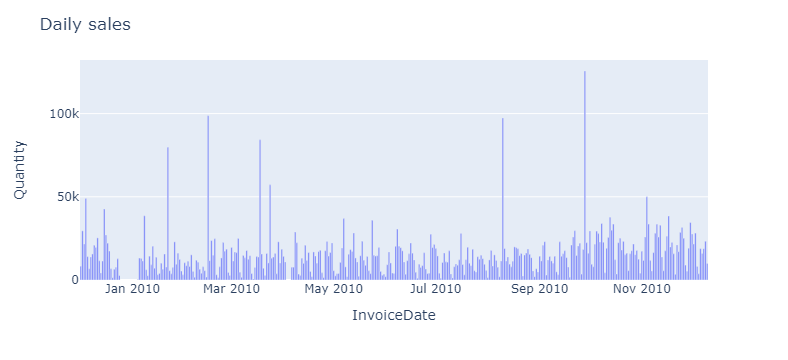

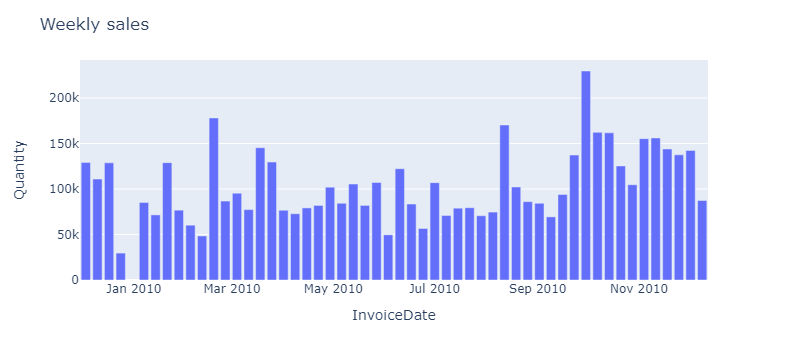

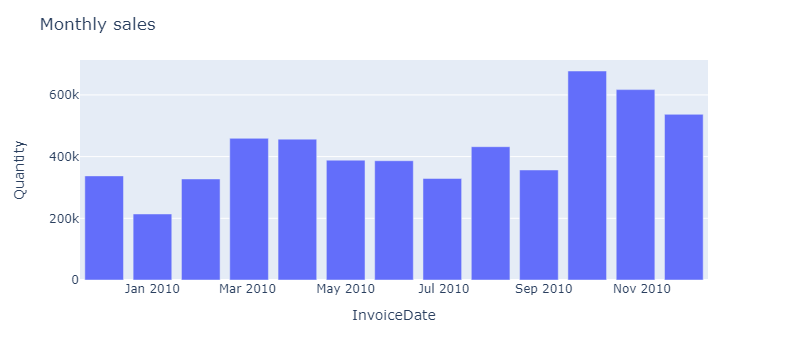

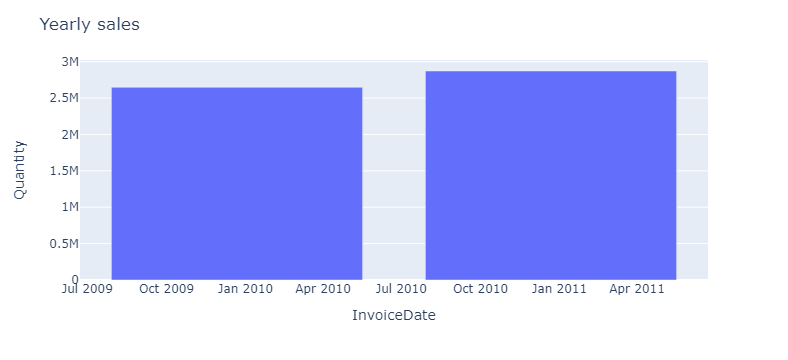

In [172]:
plot_ventas(df_clean)

El gráfico diario es el más interesante, donde se nota:

* La última semana de 2009 no tuvo compras
* Cada 7 días, la cantidad de ventas se reduce muchísimo. Esto puede ser porque el día coincide con un fin de semana.
* Los otros días de la semana tienen entre 15 mil a 20 mil compras, excepto un día que suben a estar desde 28 mil a 36 mil
* Esto último con excepción a algunos outliers muy fuertes, que llegan a valores como 90 mil (28 de Septiembre, 15 de Febrero). 

* Lo extraño de estos outliers es que solamente duran 1 día y su efecto no parece afectar a su alrededor. Si esto ocurriera, por ejemplo, por un cambio económico importante, entonces su efecto se vería reflejado en los días siguientes.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>